In [60]:
#import library
import pandas as pd #for structured data operations and manipulation
import matplotlib.pyplot as plt # draw plot
import seaborn as sns # draw boxplot
import numpy as np
from scipy.stats import kurtosis, skew

#reading train and test dataset

In [16]:
train = pd.read_csv("E:/data science/introduction to data science/lean prediction/train.csv")
#E:\data science\introduction to data science\lean prediction
test = pd.read_csv("E:/data science/introduction to data science/lean prediction/test.csv")
trainTmp = train
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Summary:

Goal: We want to predict who will get credit on the basis of the following characteristics

Type of Variable:

Target: 

Loan_Status

    Predictors:
        CoapplicantIncome
        Gender
        Married
        Dependents
        Education
        Self_Employed
        ApplicantIncome
        LoanAmount
        Loan_Amount_Term
        Credit_History
        Property_Area
        
Data type:
    
    Character:
        Gender
        Married               
        Education             
        Self_Employed         
        Property_Area 
        Dependents       
    
    Numeric:        
        ApplicantIncome
        CoapplicantIncome
        LoanAmount
        Loan_Amount_Term
        Credit_History
        Property_Area
        Loan_Status
        
Variable Category:
    
    Quantitative: #ilościowe
        Ratio:
            CoapplicantIncome
            ApplicantIncome
            LoanAmount
            Credit_History
        Interval:
            Dependents
            Loan_Amount_Term        
    
    Qualitative:  #jakościowe
        Ordinal:  #porządkowe
            Education
            Self_Employed
        Nominal:  #nominalne
            Gender
            Married
            Property_Area
            Loan_Status

#Univariate analysis

In [18]:
def boxplot(name, value, bars, trainT):
    trainT.dropna(subset=[name], inplace=True)
    print(trainT[name].unique())
    y_pos = np.arange(value)
 

    plt.bar(y_pos, trainT[name].value_counts())

   
    plt.xticks(y_pos, bars)

    plt.show()

In [49]:
def qualitativeDescription(name):
    print(train[name].value_counts())
    print(train[name].describe())
    print(train[name].unique())

In [50]:
qualitativeDescription('Gender')

Male      420
Female     91
Name: Gender, dtype: int64
count      511
unique       2
top       Male
freq       420
Name: Gender, dtype: object
['Male' 'Female']


There are more men.
We have empty fields in this value.

['Male' 'Female']


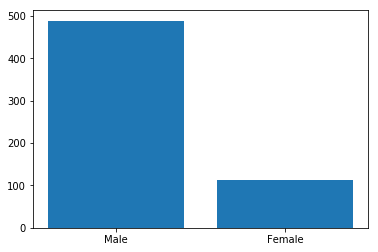

In [21]:
boxplot('Gender',2, ['Male', 'Female'], trainTmp)
trainTmp = train

In [22]:
qualitativeDescription('Married')

Yes    388
No     210
Name: Married, dtype: int64
count     598
unique      2
top       Yes
freq      388
Name: Married, dtype: object
['No' 'Yes' nan]


More people are married.
We have empty fields in this value.

['No' 'Yes']


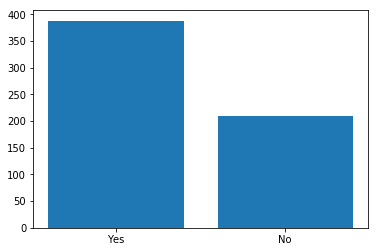

In [23]:
boxplot('Married',2, ['Yes', 'No'], trainTmp)
trainTmp = train

In [65]:
qualitativeDescription('Dependents')

0     338
1     101
2      99
3+     48
Name: Dependents, dtype: int64
count     586
unique      4
top         0
freq      338
Name: Dependents, dtype: object
['0' '1' '2' '3+']


['0' '1' '2' '3+']


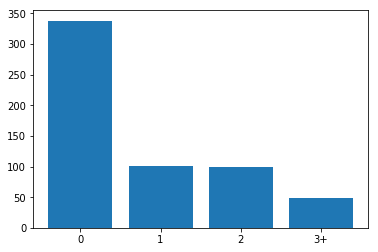

In [24]:
boxplot('Dependents',4, ['0', '1', '2', '3+'], trainTmp)
trainTmp = train

The most people have no kids. Only 51 person have three or more children

In [25]:
qualitativeDescription('Education')

Graduate        457
Not Graduate    129
Name: Education, dtype: int64
count          586
unique           2
top       Graduate
freq           457
Name: Education, dtype: object
['Graduate' 'Not Graduate']


['Graduate' 'Not Graduate']


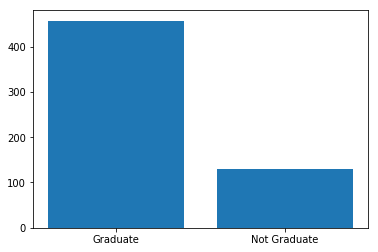

In [26]:
boxplot('Education',2, ['Graduate', 'Not Graduate'], trainTmp)
trainTmp = train

In [67]:
qualitativeDescription('Self_Employed')

No     478
Yes     76
Name: Self_Employed, dtype: int64
count     554
unique      2
top        No
freq      478
Name: Self_Employed, dtype: object
['No' 'Yes' nan]


More people are not self-employed.
We have empty fields in this value.

['No' 'Yes']


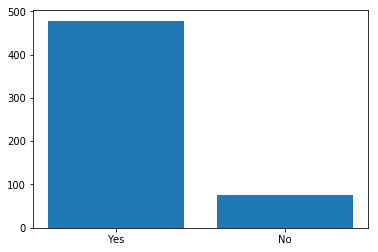

In [27]:
boxplot('Self_Employed',2, ['Yes', 'No'], trainTmp)
trainTmp = train

In [28]:
qualitativeDescription('Property_Area')

Semiurban    211
Urban        180
Rural        163
Name: Property_Area, dtype: int64
count           554
unique            3
top       Semiurban
freq            211
Name: Property_Area, dtype: object
['Urban' 'Rural' 'Semiurban']


['Urban' 'Rural' 'Semiurban']


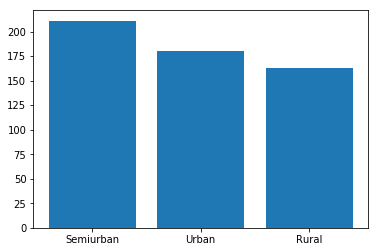

In [29]:
boxplot('Property_Area',3, ['Semiurban', 'Urban', 'Rural'], trainTmp)
trainTmp = train

In [67]:
def quantitativeDescription(name):
    print(train[name].describe())
    firstQ = (train[name].describe()[4])#25%
    thirdQ = (train[name].describe()[6])#75%
    IQR = thirdQ - firstQ
    print('IQR', IQR)
    variance = np.var(train[name])
    print('variance', variance)
    print( 'kurtosis of normal distribution', kurtosis(train[name]) )
    print( 'skewness of normal distribution', skew(train[name]) )


In [68]:
quantitativeDescription('ApplicantIncome')

count      511.000000
mean      5308.146771
std       5561.209487
min        150.000000
25%       2885.500000
50%       3858.000000
75%       5820.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64
IQR 2934.5
variance 30866528.35614907
kurtosis of normal distribution 74.7064562210345
skewness of normal distribution 6.924081137829589


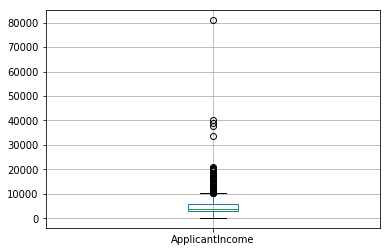

In [31]:
train.boxplot(column='ApplicantIncome')

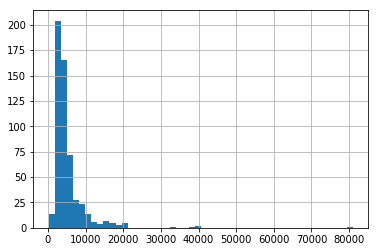

In [32]:
train['ApplicantIncome'].hist(bins=50)

In ApplicantIncome variable we have low mean and a few of outliers. This may affect the results of the prediction model

In [69]:
quantitativeDescription('CoapplicantIncome')

count      511.000000
mean      1561.997886
std       2559.383166
min          0.000000
25%          0.000000
50%       1086.000000
75%       2253.500000
max      33837.000000
Name: CoapplicantIncome, dtype: float64
IQR 2253.5
variance 6537623.319811292
kurtosis of normal distribution 58.891446967078515
skewness of normal distribution 5.912665053855806


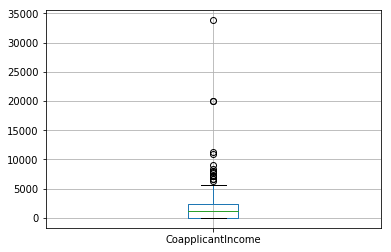

In [34]:
train.boxplot(column='CoapplicantIncome')

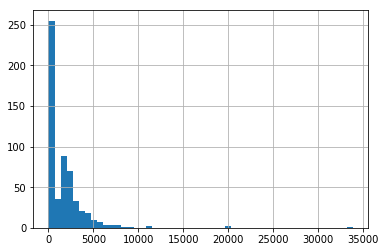

In [35]:
train['CoapplicantIncome'].hist(bins=50)

In ApplicantIncome variable we have low mean and a few of outliers. This may affect the results of the prediction model

In [70]:
quantitativeDescription('LoanAmount')

count    492.000000
mean     144.136179
std       79.765056
min        9.000000
25%      100.000000
50%      128.000000
75%      170.000000
max      600.000000
Name: LoanAmount, dtype: float64
IQR 70.0
variance 6349.5322683257355
kurtosis of normal distribution nan
skewness of normal distribution nan


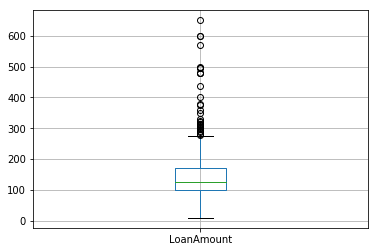

In [37]:
train.boxplot(column='LoanAmount')

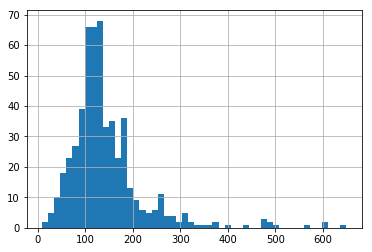

In [38]:
train['LoanAmount'].hist(bins=50)

In ApplicantIncome variable we have low mean and a lot of outliers. This may affect the results of the prediction model

In [71]:
quantitativeDescription('Loan_Amount_Term')
print(train['Loan_Amount_Term'].unique())

count    499.000000
mean     342.012024
std       64.860368
min       36.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64
IQR 0.0
variance 4198.436729169711
kurtosis of normal distribution nan
skewness of normal distribution nan
[360. 120.  nan 180.  60. 300. 480. 240.  36.  84.]


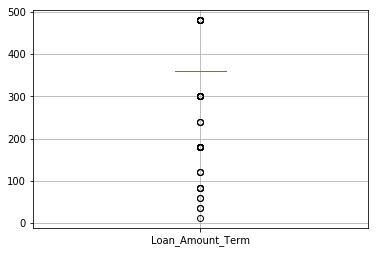

In [40]:
train.boxplot(column='Loan_Amount_Term')

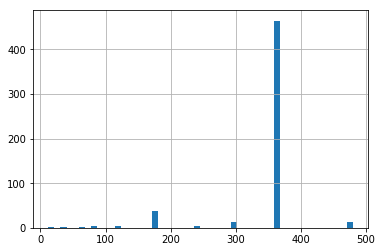

In [41]:
train['Loan_Amount_Term'].hist(bins=50)

We have 11 another value and empty fields in this value.

In [72]:
quantitativeDescription('Credit_History')
print(train['Credit_History'].unique())

count    511.000000
mean       0.843444
std        0.363738
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64
IQR 0.0
variance 0.13204606293634027
kurtosis of normal distribution 1.5731148491879337
skewness of normal distribution -1.8902684595548678
[1. 0.]


We have 2 another value and empty fields in this value.

[1. 0.]


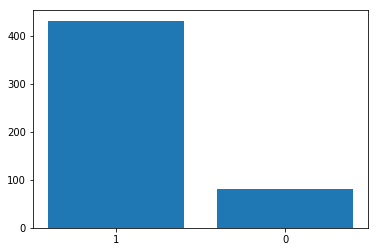

In [43]:
boxplot('Credit_History',2, ['1', '0'], trainTmp)
trainTmp = train

More people have good credit history.